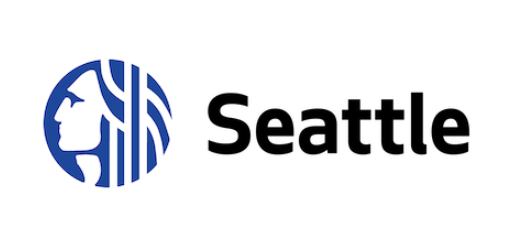

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.


<br>
<br>
<br>
<br>
Le Building Energy Benchmarking and Reporting Program de Seattle (SMC 22.920) exige des propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) qu'ils suivent leurs performances énergétiques et présentent un rapport annuel à la ville de Seattle. Les bâtiments sont responsables de 33 % des émissions de base de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre des émissions nettes de gaz à effet de serre (GES) nulles d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation de la performance des bâtiments sont des éléments fondamentaux pour créer une plus grande valeur marchande pour l'efficacité énergétique.
Conformément à l'ordonnance (125000), à partir de 2015, la ville de Seattle publiera chaque année les données relatives à tous les bâtiments de 20 000 pieds carrés et plus. Cette mise à jour du mandat d'analyse comparative a été adoptée par le conseil municipal de Seattle le 29 février 2016.


# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

* Réaliser une courte analyse exploratoire.
* Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


la taille du dataframe avec shape

In [4]:
df.shape

(3376, 46)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

OSEBuildingID--------------------------------------------------------- 3376
DataYear-------------------------------------------------------------- 1
BuildingType---------------------------------------------------------- 8
PrimaryPropertyType--------------------------------------------------- 24
PropertyName---------------------------------------------------------- 3362
Address--------------------------------------------------------------- 3354
City------------------------------------------------------------------ 1
State----------------------------------------------------------------- 1
ZipCode--------------------------------------------------------------- 55
TaxParcelIdentificationNumber----------------------------------------- 3268
CouncilDistrictCode--------------------------------------------------- 7
Neighborhood---------------------------------------------------------- 19
Latitude-------------------------------------------------------------- 2876
Longitude------------------------

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Data Cleaning

## Supression  des colonnes uniques 
City, State, Year

In [9]:
df.DataYear.value_counts()

2016    3376
Name: DataYear, dtype: int64

In [10]:
df.State.value_counts()

WA    3376
Name: State, dtype: int64

In [11]:
df.City.value_counts()

Seattle    3376
Name: City, dtype: int64

In [12]:
df.drop(['DataYear','State','City'],axis=1,inplace=True)

## Supression des colonnes inutiles
Colonnes n'apportant pas d'information pour la suite de notre étude, elles peuvent etre interessantes pour une analyse plys descriptives car elles se focalisent sur l'emplacement : PropertyName , Address , ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood
<br>
<br>

Nous ne garderons que la longitude et la lattitude pour l'emplacement, ainsi pouvoir réaliser des visualisations avec geopandas

In [13]:
df.drop(['Address', 'PropertyName', 'ZipCode', 'TaxParcelIdentificationNumber',
        'CouncilDistrictCode', 'Neighborhood'], axis=1, inplace=True)

## Missing value

,Total,Percent
Comments,3376,1.000000
Outlier,3344,0.990521
YearsENERGYSTARCertified,3257,0.964751
ThirdLargestPropertyUseType,2780,0.823460
ThirdLargestPropertyUseTypeGFA,2780,0.823460
SecondLargestPropertyUseType,1697,0.502666
SecondLargestPropertyUseTypeGFA,1697,0.502666
ENERGYSTARScore,843,0.249704
LargestPropertyUseType,20,0.005924
LargestPropertyUseTypeGFA,20,0.005924


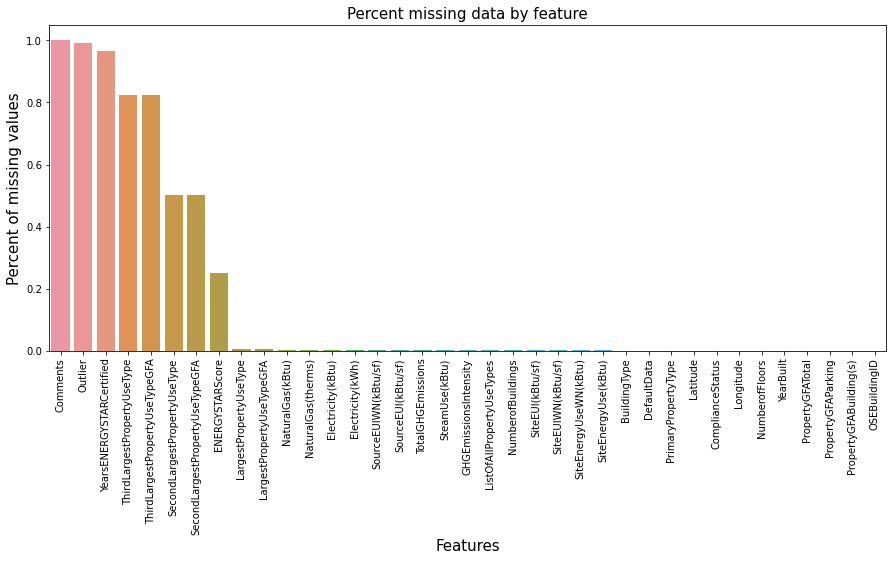

In [14]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

Supression de la feature Comments avec 100% de missiing values

In [15]:
#Supression de la feature "Comments"
df.drop(['Comments'], axis=1,inplace=True)

In [16]:
df.shape

(3376, 36)

### Outliers

In [17]:
df['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [18]:
df[df['Outlier']=='High outlier']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,NonResidential,Large Office,47.60642,-122.33581,1958,1.0,6,172842,25920,...,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
517,704,NonResidential,Large Office,47.62235,-122.36378,2000,1.0,4,129551,42500,...,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
1707,23174,Multifamily LR (1-4),Mid-Rise Multifamily,47.63435,-122.34671,1969,1.0,5,30569,0,...,0.0,1.961078e+06,6691197.0,1432.329956,143233.0,False,Non-Compliant,High outlier,54.25,1.77
2763,26852,Multifamily LR (1-4),Low-Rise Multifamily,47.59858,-122.32470,1920,1.0,4,46560,0,...,0.0,5.148407e+05,1756636.0,51247.687500,5124769.0,False,Non-Compliant,High outlier,284.42,6.11
2863,27245,Multifamily LR (1-4),Low-Rise Multifamily,47.61390,-122.32241,1910,1.0,3,24682,0,...,0.0,2.937813e+05,1002382.0,16793.890630,1679389.0,False,Non-Compliant,High outlier,96.18,3.90
2922,27526,Multifamily LR (1-4),Low-Rise Multifamily,47.62670,-122.35506,1959,2.0,4,43346,0,...,0.0,5.843347e+05,1993750.0,25253.650390,2525365.0,False,Non-Compliant,High outlier,148.02,3.41
3082,28735,Multifamily LR (1-4),Low-Rise Multifamily,47.70188,-122.32459,2008,1.0,4,46725,0,...,0.0,1.161543e+06,3963184.0,94960.359380,9496036.0,False,Non-Compliant,High outlier,531.96,11.38
3092,29390,Multifamily MR (5-9),Mid-Rise Multifamily,47.65570,-122.31244,1925,1.0,8,97923,0,...,8704596.0,4.597700e+05,1568735.0,696.960022,69696.0,False,Non-Compliant,High outlier,686.53,7.01
3265,49943,Multifamily LR (1-4),Low-Rise Multifamily,47.60994,-122.34234,1904,1.0,3,49000,0,...,0.0,1.054889e+06,3599281.0,10035.120120,1003512.0,False,Non-Compliant,High outlier,78.39,1.60


In [19]:
df[df['Outlier']=='Low outlier']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
384,539,NonResidential,Retail Store,47.66178,-122.31812,1987,1.0,2,69492,0,...,0.0,93482.601560,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,NonResidential,Large Office,47.59878,-122.33458,1913,5.0,7,154159,0,...,0.0,471503.000000,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
720,19708,Multifamily HR (10+),High-Rise Multifamily,47.61706,-122.35141,1982,1.0,24,167941,0,...,0.0,626561.625000,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
834,19934,Multifamily LR (1-4),Low-Rise Multifamily,47.62059,-122.32440,1989,1.0,4,31702,0,...,0.0,75020.898440,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
839,19967,SPS-District K-12,K-12 School,47.63203,-122.35337,2001,1.0,1,35805,0,...,0.0,72282.398440,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,Multifamily LR (1-4),Low-Rise Multifamily,47.58143,-122.37510,1990,1.0,3,70207,0,...,0.0,205885.500000,702481.0,0.000000,0.0,False,Non-Compliant,Low outlier,4.90,0.07
1045,20617,NonResidential,Retail Store,47.56535,-122.34054,1953,1.0,1,39900,0,...,0.0,14362.500000,49005.0,964.640015,96464.0,True,Error - Correct Default Data,Low outlier,5.46,0.14
1229,21315,NonResidential,Small- and Mid-Sized Office,47.61119,-122.33581,1903,1.0,3,57720,0,...,0.0,7064.899902,24105.0,0.000000,0.0,False,Non-Compliant,Low outlier,0.17,0.00
1295,21474,NonResidential,Other,47.60711,-122.33886,1900,1.0,3,49760,0,...,0.0,12981.700200,44294.0,0.000000,0.0,False,Non-Compliant,Low outlier,0.31,0.01
1341,21562,Multifamily LR (1-4),Low-Rise Multifamily,47.56336,-122.38774,1975,1.0,4,33948,0,...,0.0,56124.800780,191498.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.34,0.04


In [20]:
Outlier = df.dropna(subset = ['Outlier']).index
df.drop(Outlier, inplace = True)

In [21]:
df.drop(['Outlier'], axis=1, inplace=True)

In [22]:
df.shape

(3344, 35)

### ComplianceStatus 
état de conformité 

In [23]:
df.ComplianceStatus.value_counts()

Compliant                       3211
Error - Correct Default Data     111
Missing Data                      15
Non-Compliant                      7
Name: ComplianceStatus, dtype: int64

In [24]:
df[df['ComplianceStatus']=='Non-Compliant']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
304,435,NonResidential,Other,47.61195,-122.33167,1990,1.0,6,1400000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,Non-Compliant,0.0,0.0
578,773,NonResidential,Small- and Mid-Sized Office,47.60380,-122.33293,1924,NaN,4,63150,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
758,19798,Multifamily LR (1-4),Low-Rise Multifamily,47.68149,-122.26471,1977,NaN,3,33166,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
1549,22363,Multifamily LR (1-4),Low-Rise Multifamily,47.71965,-122.31877,1988,1.0,4,47647,0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,Non-Compliant,0.0,0.0
1792,23437,Multifamily LR (1-4),Low-Rise Multifamily,47.62479,-122.36364,1957,NaN,4,23636,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
2474,25752,Multifamily LR (1-4),Low-Rise Multifamily,47.69658,-122.34342,1989,NaN,4,29562,8531,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
2670,26532,NonResidential,Mixed Use Property,47.66182,-122.31345,1928,NaN,2,20760,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN


In [25]:
df[df['ComplianceStatus']=='Missing Data']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
28,34,SPS-District K-12,K-12 School,47.62266,-122.30547,1955,1.0,1,126351,0,...,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,SPS-District K-12,K-12 School,47.63290,-122.35172,1989,1.0,2,51582,0,...,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,SPS-District K-12,K-12 School,47.50970,-122.37759,1948,1.0,2,53352,0,...,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,SPS-District K-12,K-12 School,47.56360,-122.35800,1999,1.0,3,74468,0,...,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,SPS-District K-12,K-12 School,47.57324,-122.29058,1991,1.0,2,58933,0,...,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,SPS-District K-12,K-12 School,47.65464,-122.34912,1991,1.0,3,66588,0,...,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,SPS-District K-12,K-12 School,47.69675,-122.37760,1959,1.0,1,160270,0,...,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,Missing Data,229.38,1.43
139,227,SPS-District K-12,K-12 School,47.59796,-122.30415,1963,1.0,3,136188,0,...,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,Missing Data,170.90,1.25
152,242,SPS-District K-12,K-12 School,47.69823,-122.32126,1989,1.0,2,52792,0,...,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
614,820,SPS-District K-12,K-12 School,47.60120,-122.31548,1988,1.0,1,52924,0,...,0.0,0.0,573642.5000,1957268.0,0.000000,0.0,False,Missing Data,13.64,0.26


In [26]:
df[df['ComplianceStatus']=='Error - Correct Default Data']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,SPS-District K-12,K-12 School,47.545760,-122.268530,1961,1.0,2,56228,0,...,1.713624e+06,0.0,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,True,Error - Correct Default Data,38.53,0.69
30,36,SPS-District K-12,K-12 School,47.709940,-122.293010,1949,1.0,2,160645,0,...,7.800350e+06,0.0,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,True,Error - Correct Default Data,270.18,1.68
38,51,SPS-District K-12,K-12 School,47.682520,-122.294980,1950,1.0,2,175565,0,...,7.329818e+06,0.0,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,True,Error - Correct Default Data,266.05,1.52
86,125,SPS-District K-12,K-12 School,47.564130,-122.312080,1957,1.0,1,130862,0,...,7.300978e+06,0.0,6.631945e+05,2.262820e+06,41932.066410,4.193207e+06,True,Error - Correct Default Data,238.48,1.82
87,127,SPS-District K-12,K-12 School,47.554780,-122.275960,1989,1.0,3,59955,0,...,1.749171e+06,0.0,4.209894e+05,1.436416e+06,1969.832520,1.969830e+05,True,Error - Correct Default Data,20.48,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,29069,Multifamily LR (1-4),Senior Care Community,47.500619,-122.220966,1995,1.0,3,124930,0,...,6.987057e+06,0.0,1.265544e+06,4.318036e+06,24059.349610,2.405935e+06,True,Error - Correct Default Data,157.88,1.26
3126,39332,SPS-District K-12,K-12 School,47.523740,-122.272010,2009,1.0,2,138705,0,...,5.344758e+06,0.0,8.805380e+05,3.004396e+06,19549.021480,1.954902e+06,True,Error - Correct Default Data,124.77,0.90
3366,50210,Nonresidential COS,Office,47.635720,-122.375250,1952,1.0,1,13661,0,...,5.585251e+05,0.0,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,Error - Correct Default Data,3.50,0.26
3369,50220,Nonresidential COS,Office,47.564400,-122.278130,1960,1.0,1,15398,0,...,4.141724e+05,0.0,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,Error - Correct Default Data,7.79,0.51


In [27]:
df=df[df['ComplianceStatus']=='Compliant']

In [28]:
df.drop(['ComplianceStatus'],axis=1, inplace=True)

### DefaultData

In [29]:
df.DefaultData.value_counts()

False    3211
Name: DefaultData, dtype: int64

In [30]:
df.drop(['DefaultData'],axis=1, inplace=True)

In [31]:
df_residence = df.copy()

 ### BuildingType

In [32]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'Campus', 'SPS-District K-12', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

bâtiments non destinés à l’habitation

In [33]:
Building = ['NonResidential', 'Nonresidential COS',
            'Campus', 'SPS-District K-12']
df = df[df['BuildingType'].isin(Building)]

In [34]:
df.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        705
SecondLargestPropertyUseTypeGFA     705
ThirdLargestPropertyUseType        1199
ThirdLargestPropertyUseTypeGFA     1199
YearsENERGYSTARCertified           1450
ENERGYSTARScore                     550
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    1
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0


In [35]:
Residence = ['Multifamily MR (5-9)',
             'Campus', 'SPS-District K-12', 'Multifamily LR (1-4)',
             'Multifamily HR (10+)']
df_residence = df_residence[df_residence['BuildingType'].isin(Residence)]

### PrimaryPropertyType

In [36]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily'],
      dtype=object)

In [37]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

On retire Low-Rise Multifamily

In [38]:
PrimaryProperty = ['Hotel', 'Other', 'Mixed Use Property', 'University',
                   'Small- and Mid-Sized Office', 'Self-Storage Facility',
                   'Warehouse', 'K-12 School', 'Large Office',
                   'Senior Care Community', 'Medical Office', 'Retail Store',
                   'Hospital', 'Residence Hall', 'Distribution Center',
                   'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
                   'Refrigerated Warehouse', 'Restaurant']

In [39]:
df = df[df['PrimaryPropertyType'].isin(PrimaryProperty)]

In [40]:
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,47.61220,-122.33799,1927,1.0,12,88434,0,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,2,NonResidential,Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,3,NonResidential,Hotel,47.61393,-122.33810,1969,1.0,41,956110,196718,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,5,NonResidential,Hotel,47.61412,-122.33664,1926,1.0,10,61320,0,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,8,NonResidential,Hotel,47.61375,-122.34047,1980,1.0,18,175580,62000,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,47.54067,-122.37441,1982,1.0,1,18261,0,...,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3372,50223,Nonresidential COS,Other,47.59625,-122.32283,2004,1.0,1,16000,0,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,50224,Nonresidential COS,Other,47.63644,-122.35784,1974,1.0,1,13157,0,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,47.52832,-122.32431,1989,1.0,1,14101,0,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


In [41]:
df_residence['PrimaryPropertyType'].unique()

array(['Mid-Rise Multifamily', 'Mixed Use Property', 'K-12 School',
       'University', 'Large Office', 'Low-Rise Multifamily', 'Other',
       'High-Rise Multifamily', 'Senior Care Community',
       'Small- and Mid-Sized Office', 'Restaurant', 'Hotel',
       'Residence Hall'], dtype=object)

In [60]:
Residence_PrimaryProperty = ['K-12 School', 'University', 'Large Office', 'Other',
                   'Small- and Mid-Sized Office', 'Restaurant', 'Hotel', ]

In [61]:
df_residence = df_residence[df_residence['PrimaryPropertyType'].isin(Residence_PrimaryProperty)]

In [62]:
df_residence 

,OSEBuildingID,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
37,50,SPS-District K-12,K-12 School,47.65671,-122.39047,1990,1.0,2,54986,0,...,83.199997,1.650279e+06,1.802471e+06,0.000000e+00,3.568550e+05,1217589.0,4326.897461,432690.0,31.47,0.57
93,138,SPS-District K-12,K-12 School,47.72570,-122.33684,1959,1.0,1,245587,0,...,89.099998,1.176568e+07,1.287092e+07,0.000000e+00,1.150648e+06,3926011.0,78396.695310,7839670.0,443.73,1.81
105,172,Campus,University,47.54700,-122.35307,1970,27.0,2,441071,0,...,202.600006,3.830174e+07,4.115173e+07,0.000000e+00,7.419278e+06,25314575.0,129871.664100,12987166.0,866.23,1.96
116,185,SPS-District K-12,K-12 School,47.70763,-122.29453,2011,1.0,2,236758,0,...,84.400002,8.355988e+06,9.287467e+06,0.000000e+00,1.403854e+06,4789948.0,35660.394530,3566039.0,222.78,0.94
128,211,Campus,University,47.69936,-122.33401,1970,11.0,2,694072,111625,...,167.000000,3.589148e+07,3.741080e+07,0.000000e+00,9.803878e+06,33450832.0,24406.478520,2440648.0,362.82,0.52
137,225,SPS-District K-12,K-12 School,47.52915,-122.36511,2010,1.0,2,367884,0,...,85.900002,1.226552e+07,1.327934e+07,0.000000e+00,2.404754e+06,8205020.0,40604.957030,4060496.0,272.85,0.74
162,261,Campus,Large Office,47.52429,-122.31234,1980,14.0,2,334368,31874,...,453.299988,5.346668e+07,5.413607e+07,0.000000e+00,1.328294e+07,45321378.0,81453.000000,8145300.0,748.55,2.24
195,315,Campus,Other,47.61137,-122.34947,1995,4.0,3,215476,0,...,251.800003,2.401777e+07,2.460637e+07,0.000000e+00,4.041282e+06,13788853.0,102289.164100,10228916.0,639.39,2.97
340,477,Campus,Other,47.62855,-122.33035,1997,1.0,5,535947,0,...,515.599976,1.313739e+08,1.371061e+08,0.000000e+00,1.894122e+07,64627449.0,667464.250000,66746425.0,3995.45,7.45
632,854,SPS-District K-12,Other,47.58050,-122.33032,2002,1.0,3,338063,0,...,176.800003,2.067592e+07,2.086266e+07,0.000000e+00,5.327046e+06,18175883.0,25000.353520,2500035.0,259.49,0.77


## Duplicate value

In [42]:
df.duplicated(subset=['OSEBuildingID'], keep=False).value_counts()

False    1545
dtype: int64

Dans la visualisation ci-dessus, certaines variables apparaissent déjà comme redondantes :

Electricity(kWh) et Electricity(kBtu),
NaturalGas(therms) et NaturalGas(kBtu)

# Feature engineering

In [43]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

<AxesSubplot:>

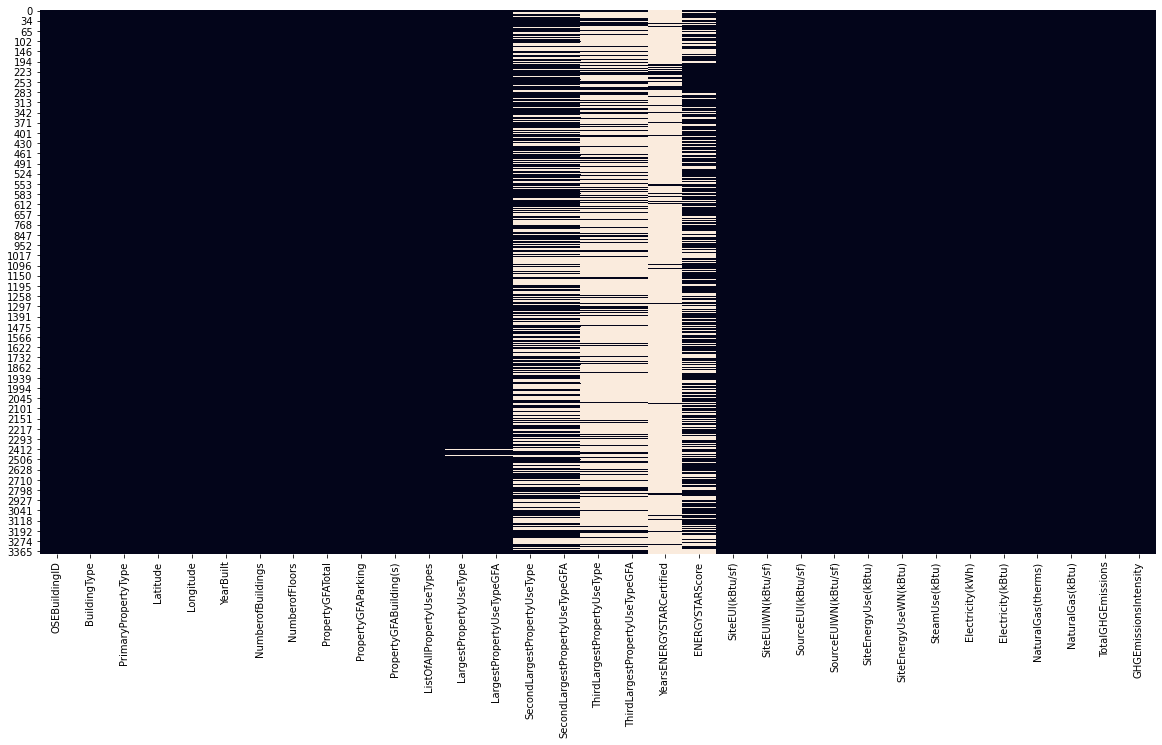

In [44]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [45]:
Energy = ['SiteEUI(kBtu/sf)',
          'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
          'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
          'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
          'NaturalGas(kBtu)']

## Geopandas

In [46]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [47]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [48]:
gdf.crs

In [49]:
gdf = gdf[gdf.is_valid == True]

<AxesSubplot:>

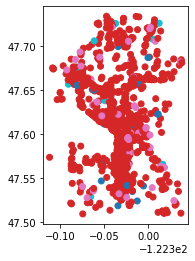

In [50]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType")

Nous pouvons également calculer la surface moyenne par bâtiment et par étage

check si dans les résidential il n'y a pas des property type à usage non résidential

Other dans property type, renseigner trouver l'info

# Analyse univariée

## Distribution des variables quantitatives

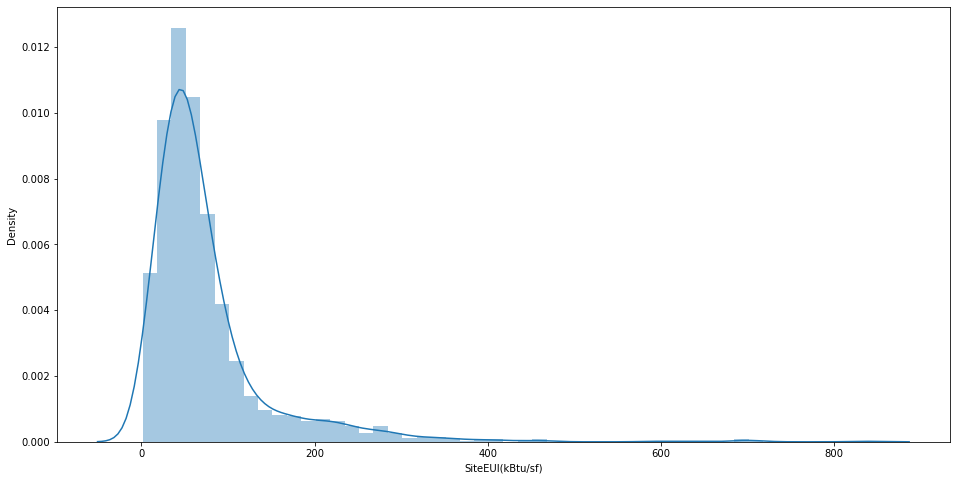

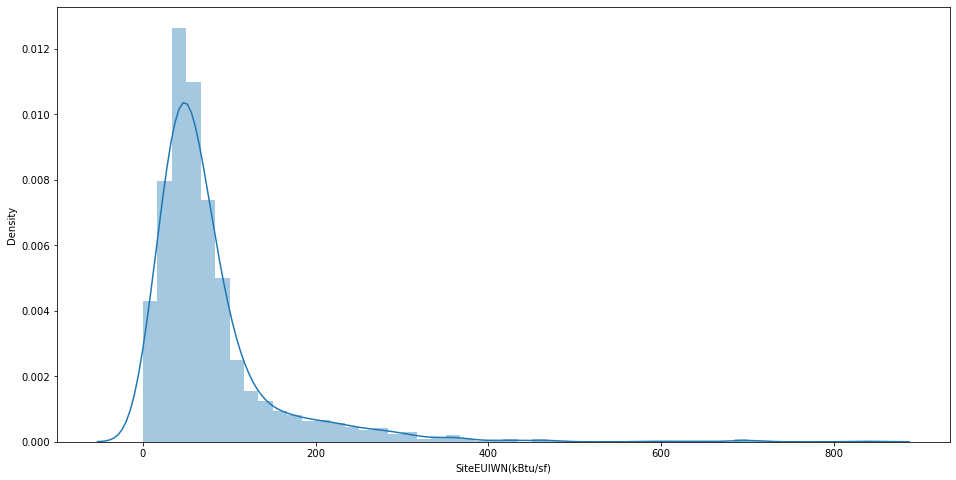

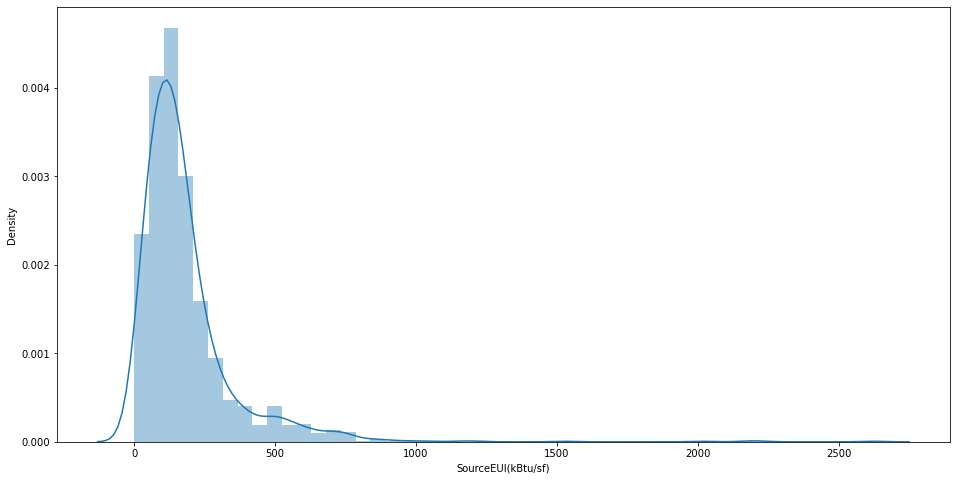

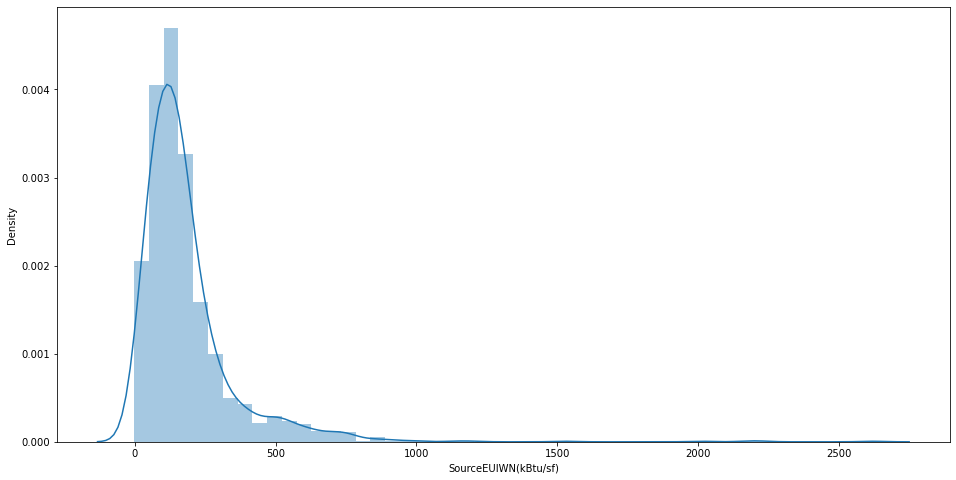

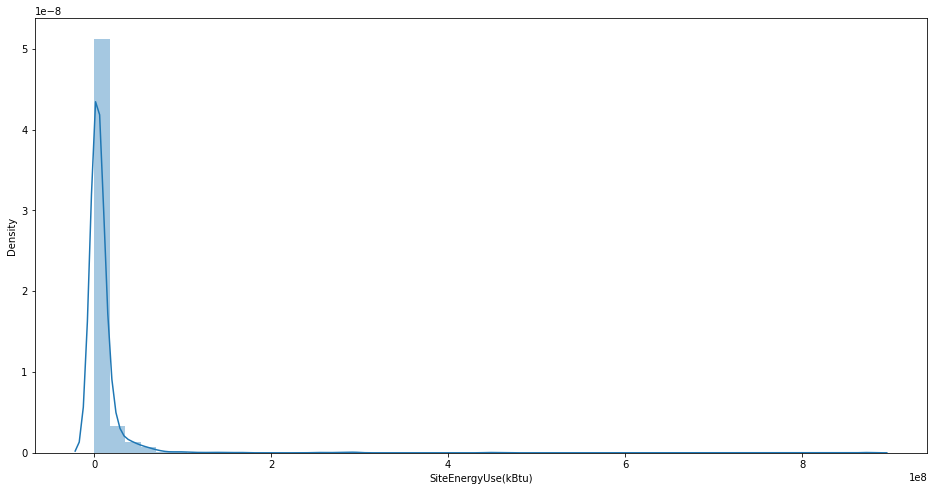

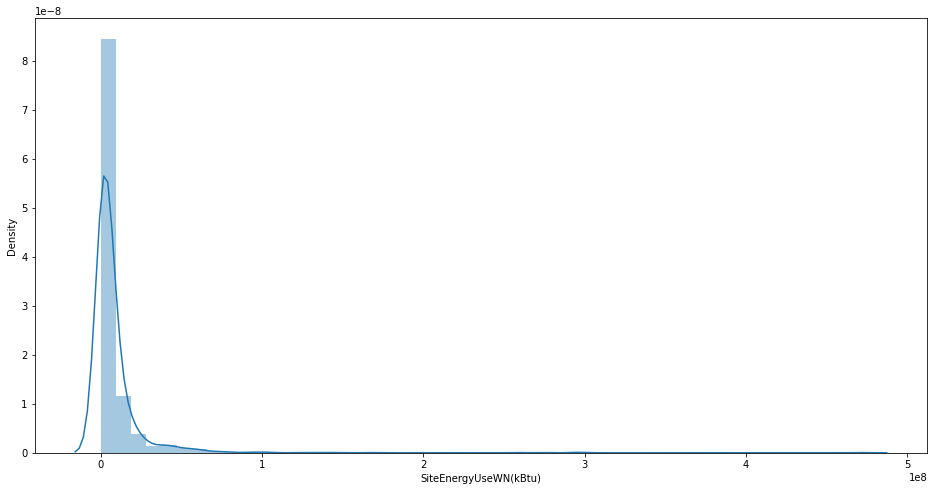

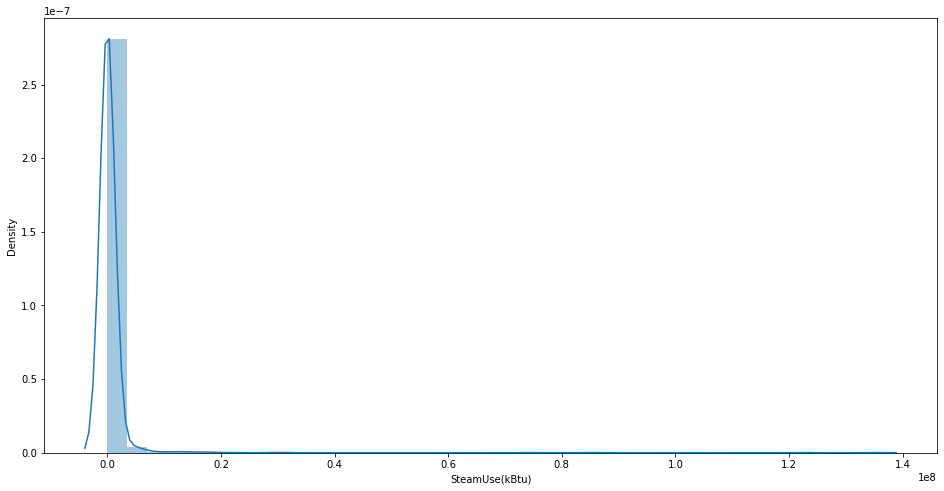

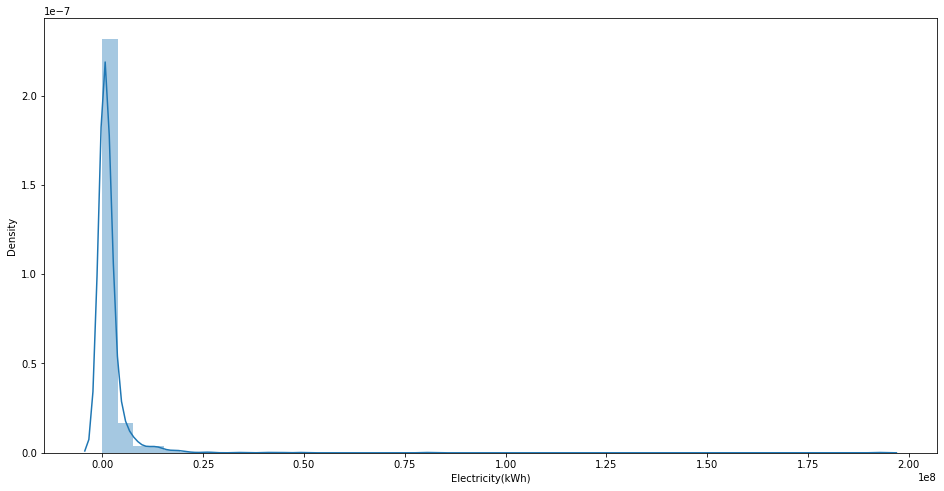

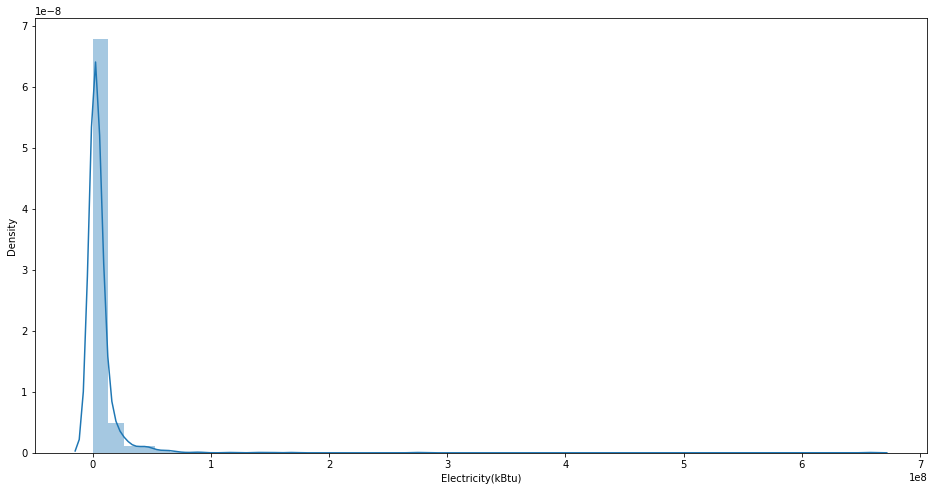

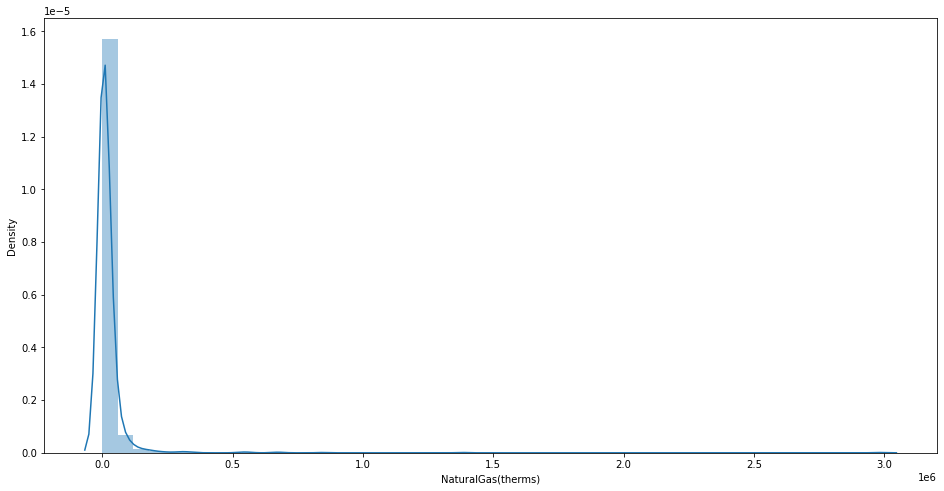

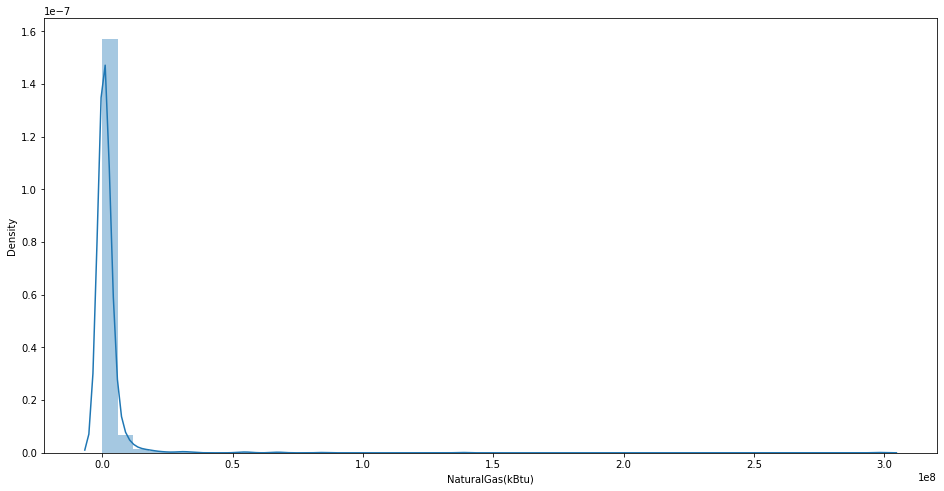

In [51]:
#distplot
for col in df[Energy]:
    plt.figure(figsize=(16, 8))
    sns.distplot(df[col], kde=True)
    plt.show()

Latitude


<Figure size 1152x576 with 0 Axes>

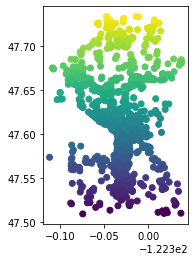

Longitude


<Figure size 1152x576 with 0 Axes>

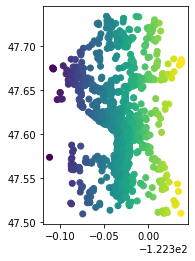

NumberofBuildings


<Figure size 1152x576 with 0 Axes>

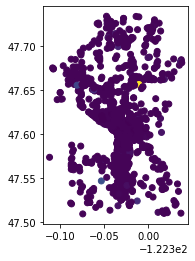

LargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

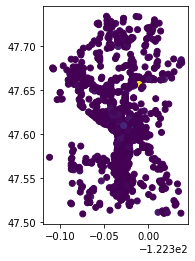

SecondLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

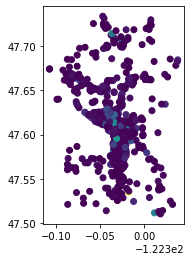

ThirdLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

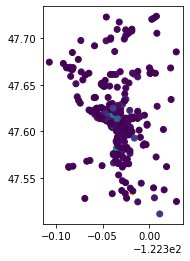

ENERGYSTARScore


<Figure size 1152x576 with 0 Axes>

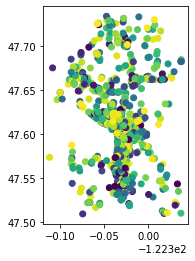

SiteEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

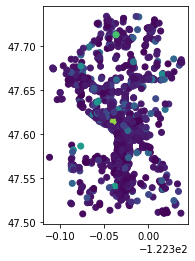

SiteEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

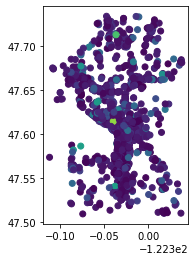

SourceEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

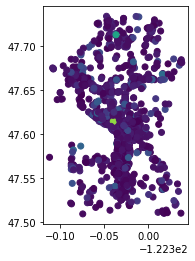

SourceEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

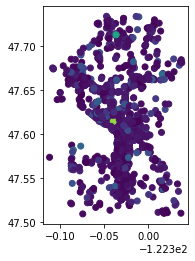

SiteEnergyUse(kBtu)


<Figure size 1152x576 with 0 Axes>

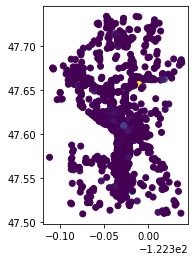

SiteEnergyUseWN(kBtu)


<Figure size 1152x576 with 0 Axes>

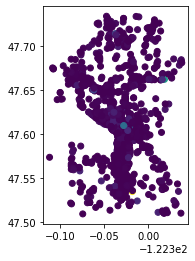

SteamUse(kBtu)


<Figure size 1152x576 with 0 Axes>

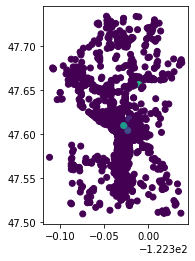

Electricity(kWh)


<Figure size 1152x576 with 0 Axes>

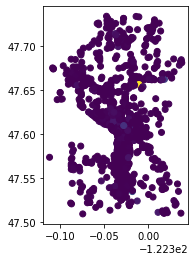

Electricity(kBtu)


<Figure size 1152x576 with 0 Axes>

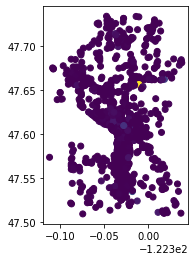

NaturalGas(therms)


<Figure size 1152x576 with 0 Axes>

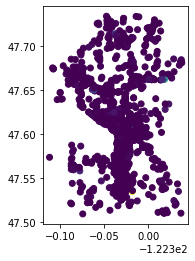

NaturalGas(kBtu)


<Figure size 1152x576 with 0 Axes>

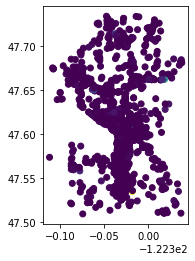

TotalGHGEmissions


<Figure size 1152x576 with 0 Axes>

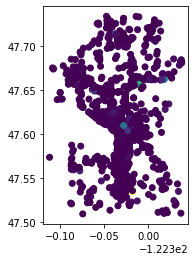

GHGEmissionsIntensity


<Figure size 1152x576 with 0 Axes>

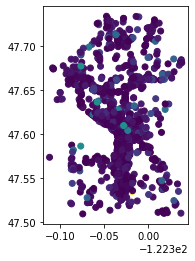

In [52]:
#distplot
for col in gdf.select_dtypes('float'):
    plt.figure(figsize=(16, 8))
    print(col)
    gdf.plot(column = col)
    plt.show()

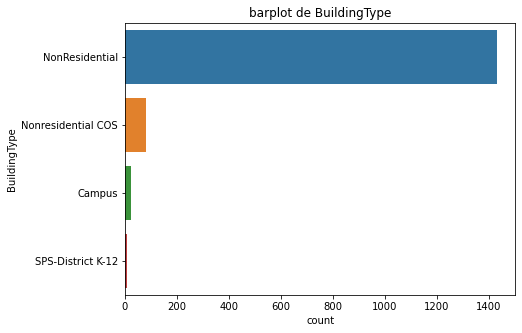

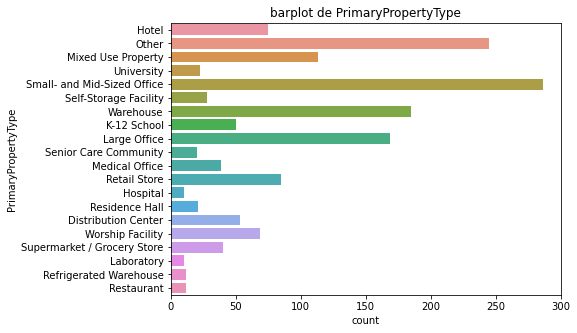

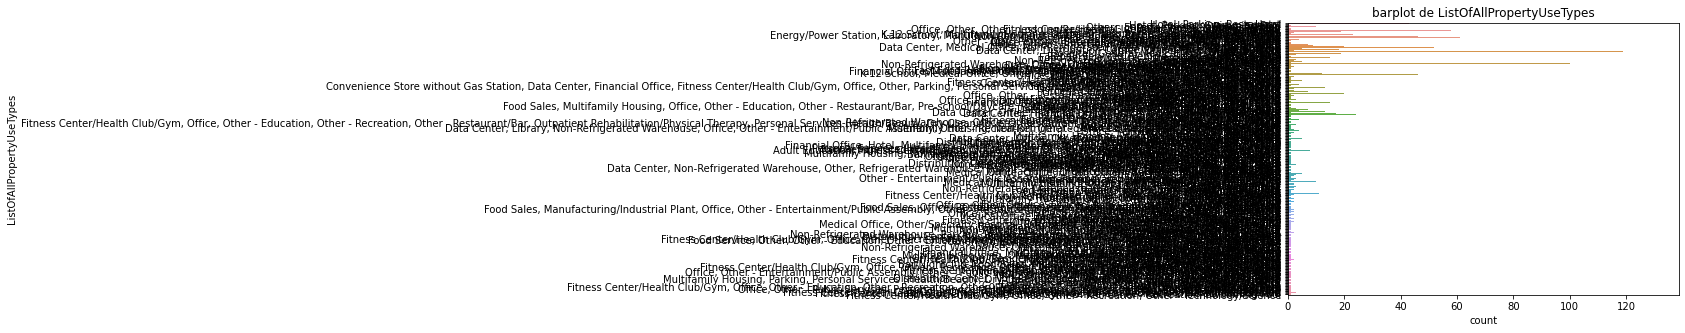

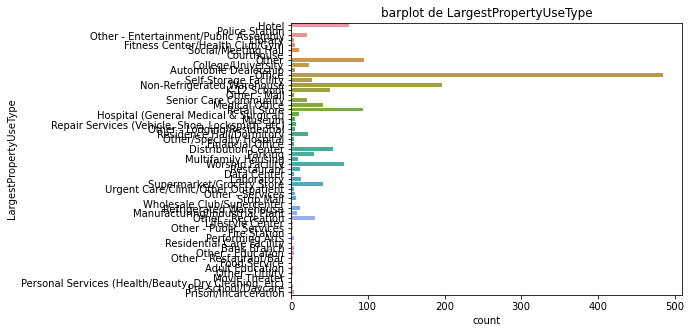

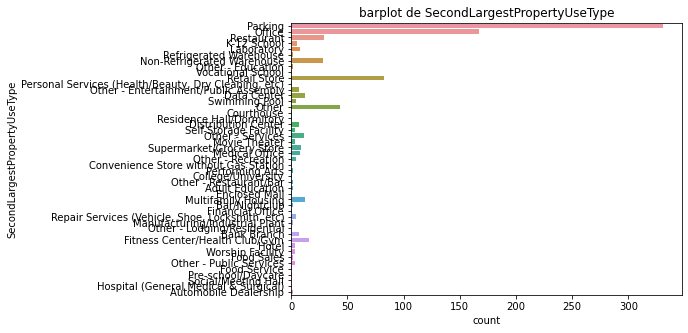

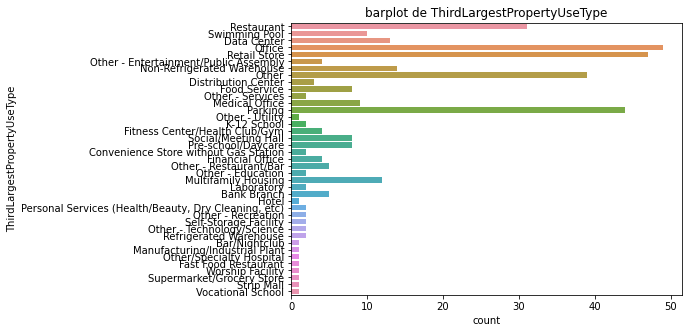

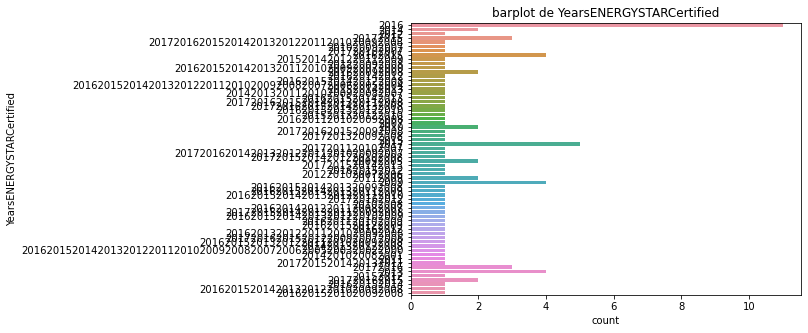

In [53]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=(7,5))
    sns.countplot(y=df[col])
    plt.title('barplot de '+col)
    plt.show()

# Analyse Bivariée

## Matrice de Corrélation

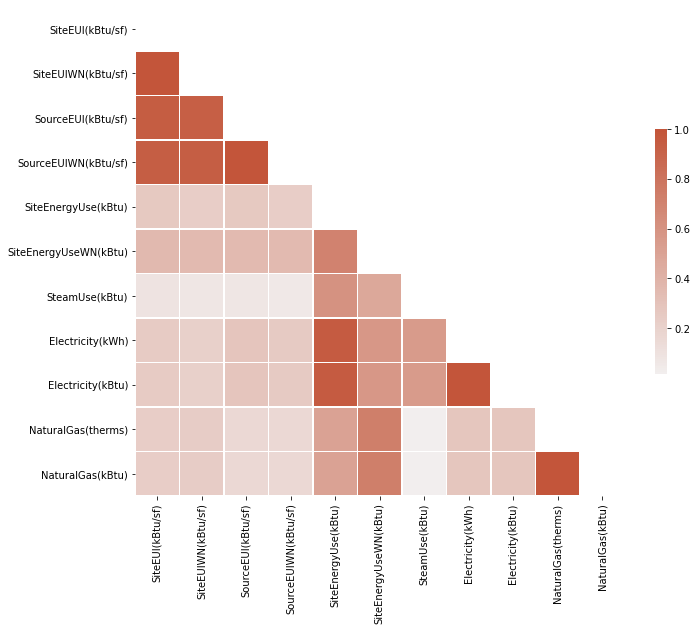

In [54]:
# Compute the correlation matrix
corr = df[Energy ].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Observation suite à la matrice de corrélation:

* 
* 
* 

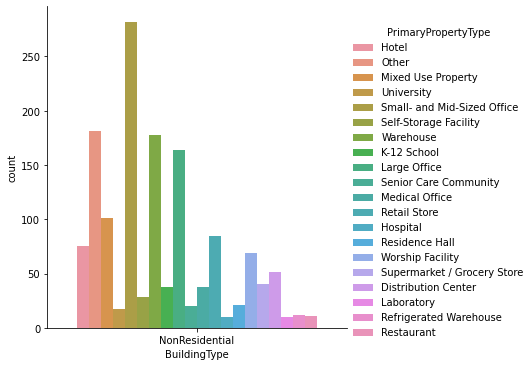

In [55]:
sns.catplot(x="BuildingType", hue="PrimaryPropertyType",
            data=df[df["BuildingType"] == "NonResidential"], kind='count', legend_out=True)

surprimer 1 row WA dans bulting type >> check documentation pour voir la signification

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NonResidential'),
  Text(1, 0, 'Nonresidential COS'),
  Text(2, 0, 'Campus'),
  Text(3, 0, 'SPS-District K-12')])

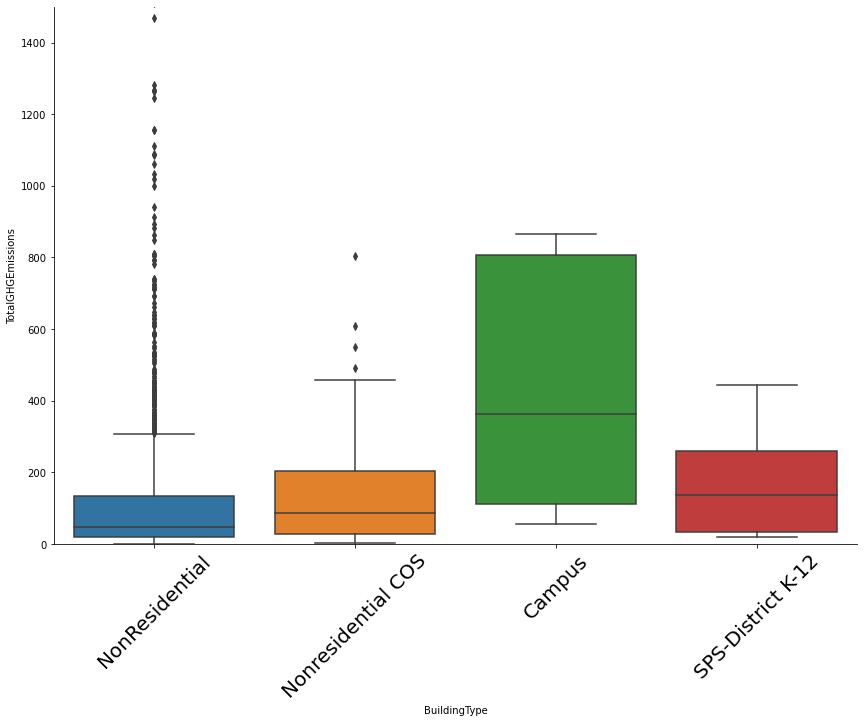

In [56]:
sns.catplot(x = 'BuildingType' , y = 'TotalGHGEmissions', data = df ,kind='box',height=8, aspect=1.5)
plt.ylim(0,1500)
plt.xticks(rotation = 45, fontsize = 20)

In [57]:
df.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)

In [58]:
df.shape

(1545, 34)